In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/content/mtcars.csv')


In [2]:
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [7]:
sam=df.drop(columns=['Unnamed: 0'])

In [12]:
X = sam.drop(columns=['mpg'])

y = df['mpg']



In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
mpg,0
cyl,0
disp,0
hp,0
drat,0
wt,0
qsec,0
vs,0
am,0


In [14]:
X

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [15]:
y

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7
5,18.1
6,14.3
7,24.4
8,22.8
9,19.2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)




In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Linear MSE:", mean_squared_error(y_test, y_pred_linear))



Ridge MSE: 8.187194974563445
Linear MSE: 10.130154667787272


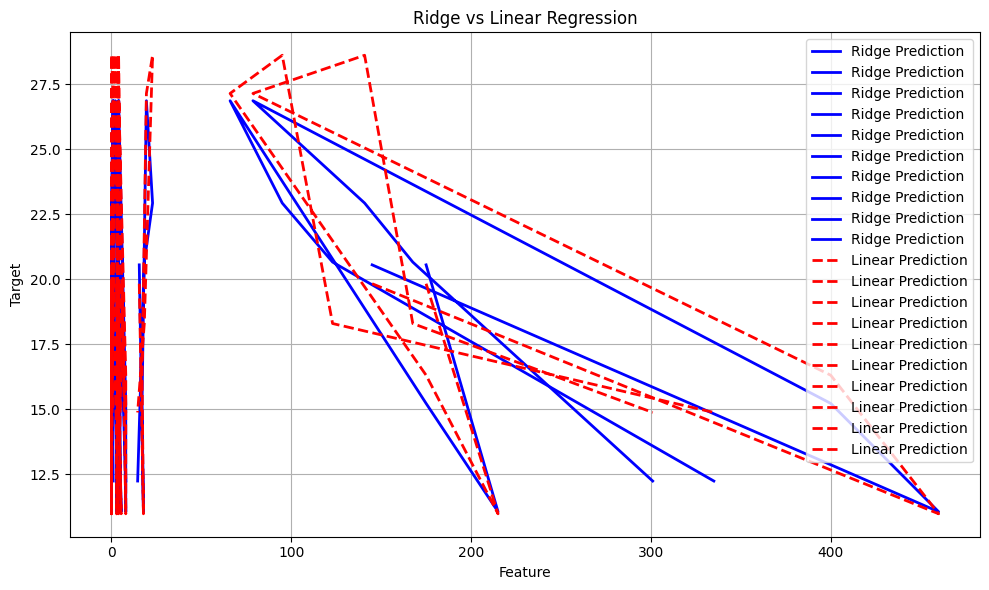

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(X_test, y_pred_ridge, color='blue', linewidth=2, label='Ridge Prediction')
plt.plot(X_test, y_pred_linear, color='red', linestyle='--', linewidth=2, label='Linear Prediction')
plt.title("Ridge vs Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()